In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Importing Data with Features 
data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final_Cleaned.csv')
data_utilitarian = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final_Cleaned.csv')

In [3]:
# Combining data in one dataframe
data= pd.concat([data_hedonic, data_utilitarian])


data['Product Type'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
print(data['Product Type'].value_counts())

data_helpful = data[data['helpful_vote'] != 0]


Product Type
Hedonic        18456
Utilitarian    18154
Name: count, dtype: int64


# 2. Product Description

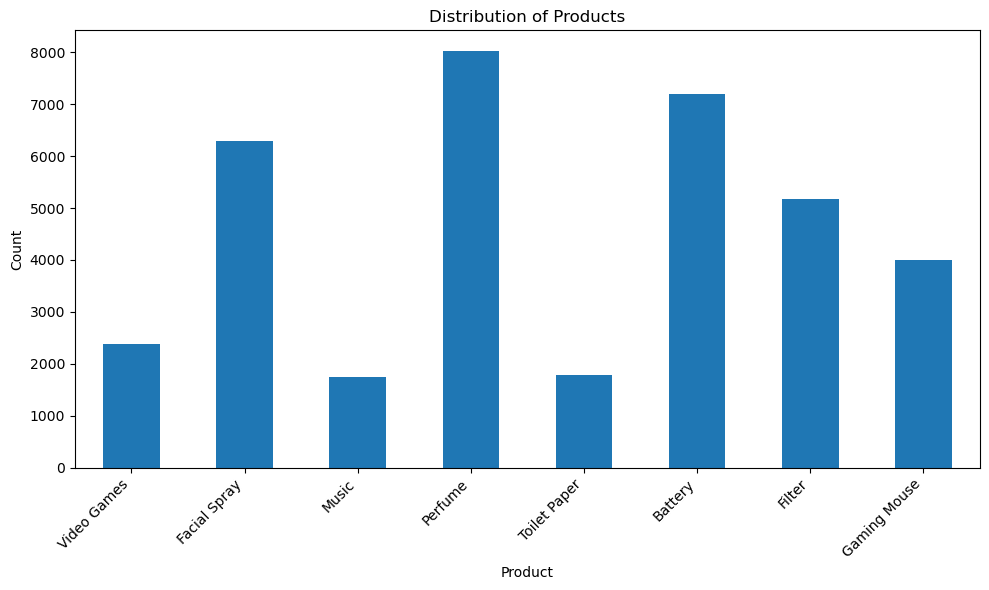

In [4]:
# Get the unique products
unique_products = data['Prod'].unique()

# Count the number of reviews for each product
product_counts = data['Prod'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


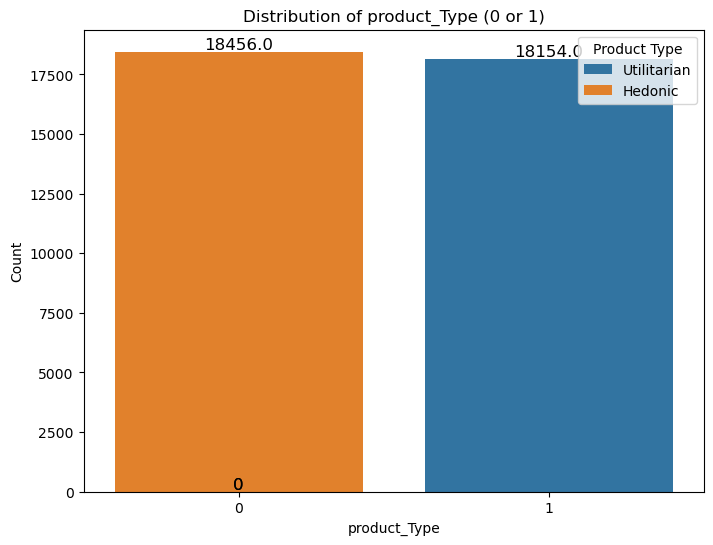

In [5]:
# Giving overview over the distribution of the product types 
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Product Type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Adding labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()

In [6]:
# Function Building for analyzing the Helpful Review by product type
def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['Prod'].unique()

    # Initialize lists to store counts
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where Helpful Review are zero for the current product type
        not_helpful_votes_count = data[(data['Product_Type'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where Helpful Review are greater than zero for the current product type
        helpful_votes_count = data[(data['Product_Type'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Product': product_types,
        'Unhelpful Review': not_helpful_votes_counts,
        'Helpful Review': helpful_votes_counts
    })

    # Melt the DataFrame for seaborn
    plot_data = plot_data.melt(id_vars='Prod', var_name='Vote Type', value_name='Count')

    # Create a stacked bar chart using seaborn
    plt.figure(figsize=(12, 6), dpi=800)
    ax = sns.barplot(x='Prod', y='Count', hue='Vote Type', data=plot_data,edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

    for i in ax.containers:
         ax.bar_label(i,)

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Distribution of helpful reviews across product categories')
    plt.legend(title='Vote Type')

    # Display the plot
    plt.show()

In [7]:
#Function for calculating the review counts by product type/Helpful Review 
def calculate_review_counts(data, category_column='Prod'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where Helpful Review are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where Helpful Review are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of Helpful Review
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Calculate percentage of Unhelpful Review
    unhelpful_vote_percentages = [(not_h / total) * 100 if total != 0 else 0 for not_h, total in zip(not_helpful_votes_counts, total_reviews_counts)]
    # Create DataFrame to store counts with categories
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Unhelpful Reviews': not_helpful_votes_counts,
        'Helpful Reviews': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Review Ratio': helpful_vote_percentages,
        'Unhelpful Review Ratio': unhelpful_vote_percentages
    })

    # Display the DataFrame
    return(counts_df)


## 2. Helpfulness Analysis

In [8]:
plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)

KeyError: 'Product_Type'

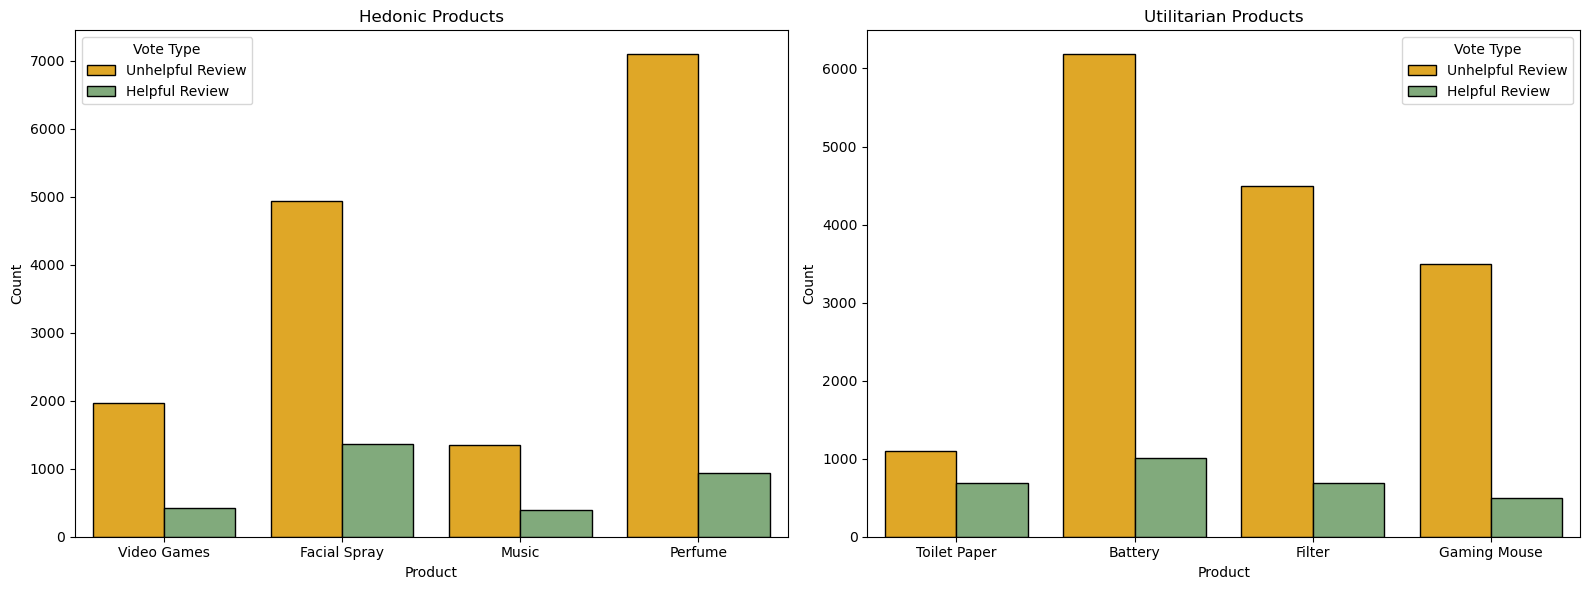

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get unique product types for hedonic and utilitarian data
hedonic_product_types = data_hedonic['Prod'].unique()
utilitarian_product_types = data_utilitarian['Prod'].unique()

# Initialize lists to store counts for hedonic and utilitarian data
hedonic_not_helpful_votes_counts = []
hedonic_helpful_votes_counts = []
utilitarian_not_helpful_votes_counts = []
utilitarian_helpful_votes_counts = []

# Calculate counts for each product type for hedonic data
for product_type in hedonic_product_types:
    # Count of rows where Helpful Review are zero for the current product type
    not_helpful_votes_count = data_hedonic[(data_hedonic['Prod'] == product_type) & (data_hedonic['helpful_vote'] == 0)].shape[0]
    hedonic_not_helpful_votes_counts.append(not_helpful_votes_count)

    # Count of rows where Helpful Review are greater than zero for the current product type
    helpful_votes_count = data_hedonic[(data_hedonic['Prod'] == product_type) & (data_hedonic['helpful_vote'] > 0)].shape[0]
    hedonic_helpful_votes_counts.append(helpful_votes_count)

# Calculate counts for each product type for utilitarian data
for product_type in utilitarian_product_types:
    # Count of rows where Helpful Review are zero for the current product type
    not_helpful_votes_count = data_utilitarian[(data_utilitarian['Prod'] == product_type) & (data_utilitarian['helpful_vote'] == 0)].shape[0]
    utilitarian_not_helpful_votes_counts.append(not_helpful_votes_count)

    # Count of rows where Helpful Review are greater than zero for the current product type
    helpful_votes_count = data_utilitarian[(data_utilitarian['Prod'] == product_type) & (data_utilitarian['helpful_vote'] > 0)].shape[0]
    utilitarian_helpful_votes_counts.append(helpful_votes_count)

# Create DataFrames for plotting for hedonic and utilitarian data
hedonic_plot_data = pd.DataFrame({
    'Product': hedonic_product_types,
    'Unhelpful Review': hedonic_not_helpful_votes_counts,
    'Helpful Review': hedonic_helpful_votes_counts
})

utilitarian_plot_data = pd.DataFrame({
    'Product': utilitarian_product_types,
    'Unhelpful Review': utilitarian_not_helpful_votes_counts,
    'Helpful Review': utilitarian_helpful_votes_counts
})

# Melt the DataFrames for seaborn for hedonic and utilitarian data
hedonic_plot_data = hedonic_plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')
utilitarian_plot_data = utilitarian_plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create stacked bar charts using seaborn for hedonic and utilitarian data
sns.barplot(x='Product', y='Count', hue='Vote Type', data=hedonic_plot_data, ax=axes[0], edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})
sns.barplot(x='Product', y='Count', hue='Vote Type', data=utilitarian_plot_data, ax=axes[1], edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

# Set titles and labels for subplots
axes[0].set_title('Hedonic Products')
axes[1].set_title('Utilitarian Products')
for ax in axes:
    ax.set_xlabel('Product')
    ax.set_ylabel('Count')
    ax.legend(title='Vote Type')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## 2.1 Helpfulness Analysis Statistic

In [10]:
# Helpfulness Analysis for Hedonic Data after product 
review_counts_hed_prod = calculate_review_counts (data_hedonic, 'Prod')
print(review_counts_hed_prod)

#Saving to CSV
review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Prod.csv', index=False)

           Prod  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1  Facial Spray               4937             1365           6302   
2         Music               1351              394           1745   
3       Perfume               7090              934           8024   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             21.659791               78.340209  
2             22.578797               77.421203  
3             11.640080               88.359920  


In [12]:
# Helpfulness Analysis for Hedonic Data after product 
review_counts_hed_prod = calculate_review_counts (data, 'Prod')
print(review_counts_hed_prod)

#Saving to CSV
review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/DataTotal_Review_Counts_Prod.csv', index=False)

           Prod  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1  Facial Spray               4937             1365           6302   
2         Music               1351              394           1745   
3       Perfume               7090              934           8024   
4  Toilet Paper               1099              687           1786   
5       Battery               6180             1011           7191   
6        Filter               4491              693           5184   
7  Gaming Mouse               3491              502           3993   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             21.659791               78.340209  
2             22.578797               77.421203  
3             11.640080               88.359920  
4             38.465845               61.534155  
5             14.059241               85.940759  
6             13.36

In [11]:
# Helpfulness Analysis for Hedonic Data after Main Category
review_counts_hed_cat = calculate_review_counts (data_hedonic, 'main_category')

#Print the results
print(review_counts_hed_cat)

#Saving to CSV
review_counts_hed_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Cat.csv', index=False)

  Main_category  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1964              421           2385   
1        Beauty              12027             2299          14326   
2         Music               1351              394           1745   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             17.651992               82.348008  
1             16.047745               83.952255  
2             22.578797               77.421203  


In [ ]:
# Helpfulness Analysis for Utilitarian Data after Product Category
review_counts_uti_prod = calculate_review_counts (data_utilitarian, 'Prod')
print (review_counts_uti_prod)

#Saving to CSV
review_counts_uti_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Prod.csv', index=False)

           Prod  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0  Toilet Paper               1099              687           1786   
1       Battery               6180             1011           7191   
2        Filter               4491              693           5184   
3  Gaming Mouse               3491              502           3993   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             38.465845               61.534155  
1             14.059241               85.940759  
2             13.368056               86.631944  
3             12.572001               87.427999  


In [ ]:
# Helpfulness Analysis for Utilitarian Data after Main Category
review_counts_uti_cat = calculate_review_counts (data_utilitarian, 'main_category')

# print 
print (review_counts_uti_cat)

#  Saving to csv
review_counts_uti_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Cat.csv')

  Main_category  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0     Household               1099              687           1786   
1   Electronics               9671             1513          11184   
2    Appliances               4491              693           5184   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             38.465845               61.534155  
1             13.528255               86.471745  
2             13.368056               86.631944  


## 2.2 Visualization

In [ ]:
import seaborn as sns
import pandas as pd

sns.set_theme(style='darkgrid')

# Create 'Helpful_Code' column based on 'helpful_vote'
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)
data['Helpful_Code'] = data['Helpful_Code'].map({1: 'helpful', 0: 'not helpful'})

# Map 'prod_type' to 'Product Type' for both dataframes
data['Product Type'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data_helpful['Product Type'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Create subplots without shared y-axis

# Plot 1: Histogram of Helpful_Code by Product Type
help =sns.histplot(data=data, x='Helpful_Code', hue='Product Type', multiple='dodge', stat='probability', ax=axes[0],
             alpha=0.9, shrink=0.8, palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, edgecolor="k")
axes[0].set_xlabel('Type of review', fontsize=16)
axes[0].set_ylabel('count', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].xaxis.grid(False)
axes[0].set_ylim(0, 15900)

# Calculate the counts and annotate the bars
counts = data.groupby(['Helpful_Code', 'Product Type']).size().unstack().fillna(0)
for container in help.containers:
    labels = [f'{int(value.get_height()*counts.sum().sum()):d}' for value in container]
    help.bar_label(container, labels=labels, fontsize=12, label_type='edge')


# Plot 2: Stripplot of helpful_ratio by Product ID and Product Type
prod = sns.stripplot(x='helpful_ratio', y='Prod', hue='Product Type', data=data_helpful,
              palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, size=12, jitter=True, dodge=True, ax=axes[1],orient='y')
axes[1].set_xlabel('Helpfulness ratio', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16, title='Product Type', title_fontsize=16)


# Adjusting Legend Size
plt.setp(help.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(help.get_legend().get_title(), fontsize='16') # for legend title

# Adjusting Legend Size
plt.setp(prod.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(prod.get_legend().get_title(), fontsize='16') # for legend title


# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Helpful_Code_Product_Type.png',dpi=400)
plt.show()


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_28288/3656321347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_helpful['Product Type'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})


<Figure size 640x480 with 0 Axes>

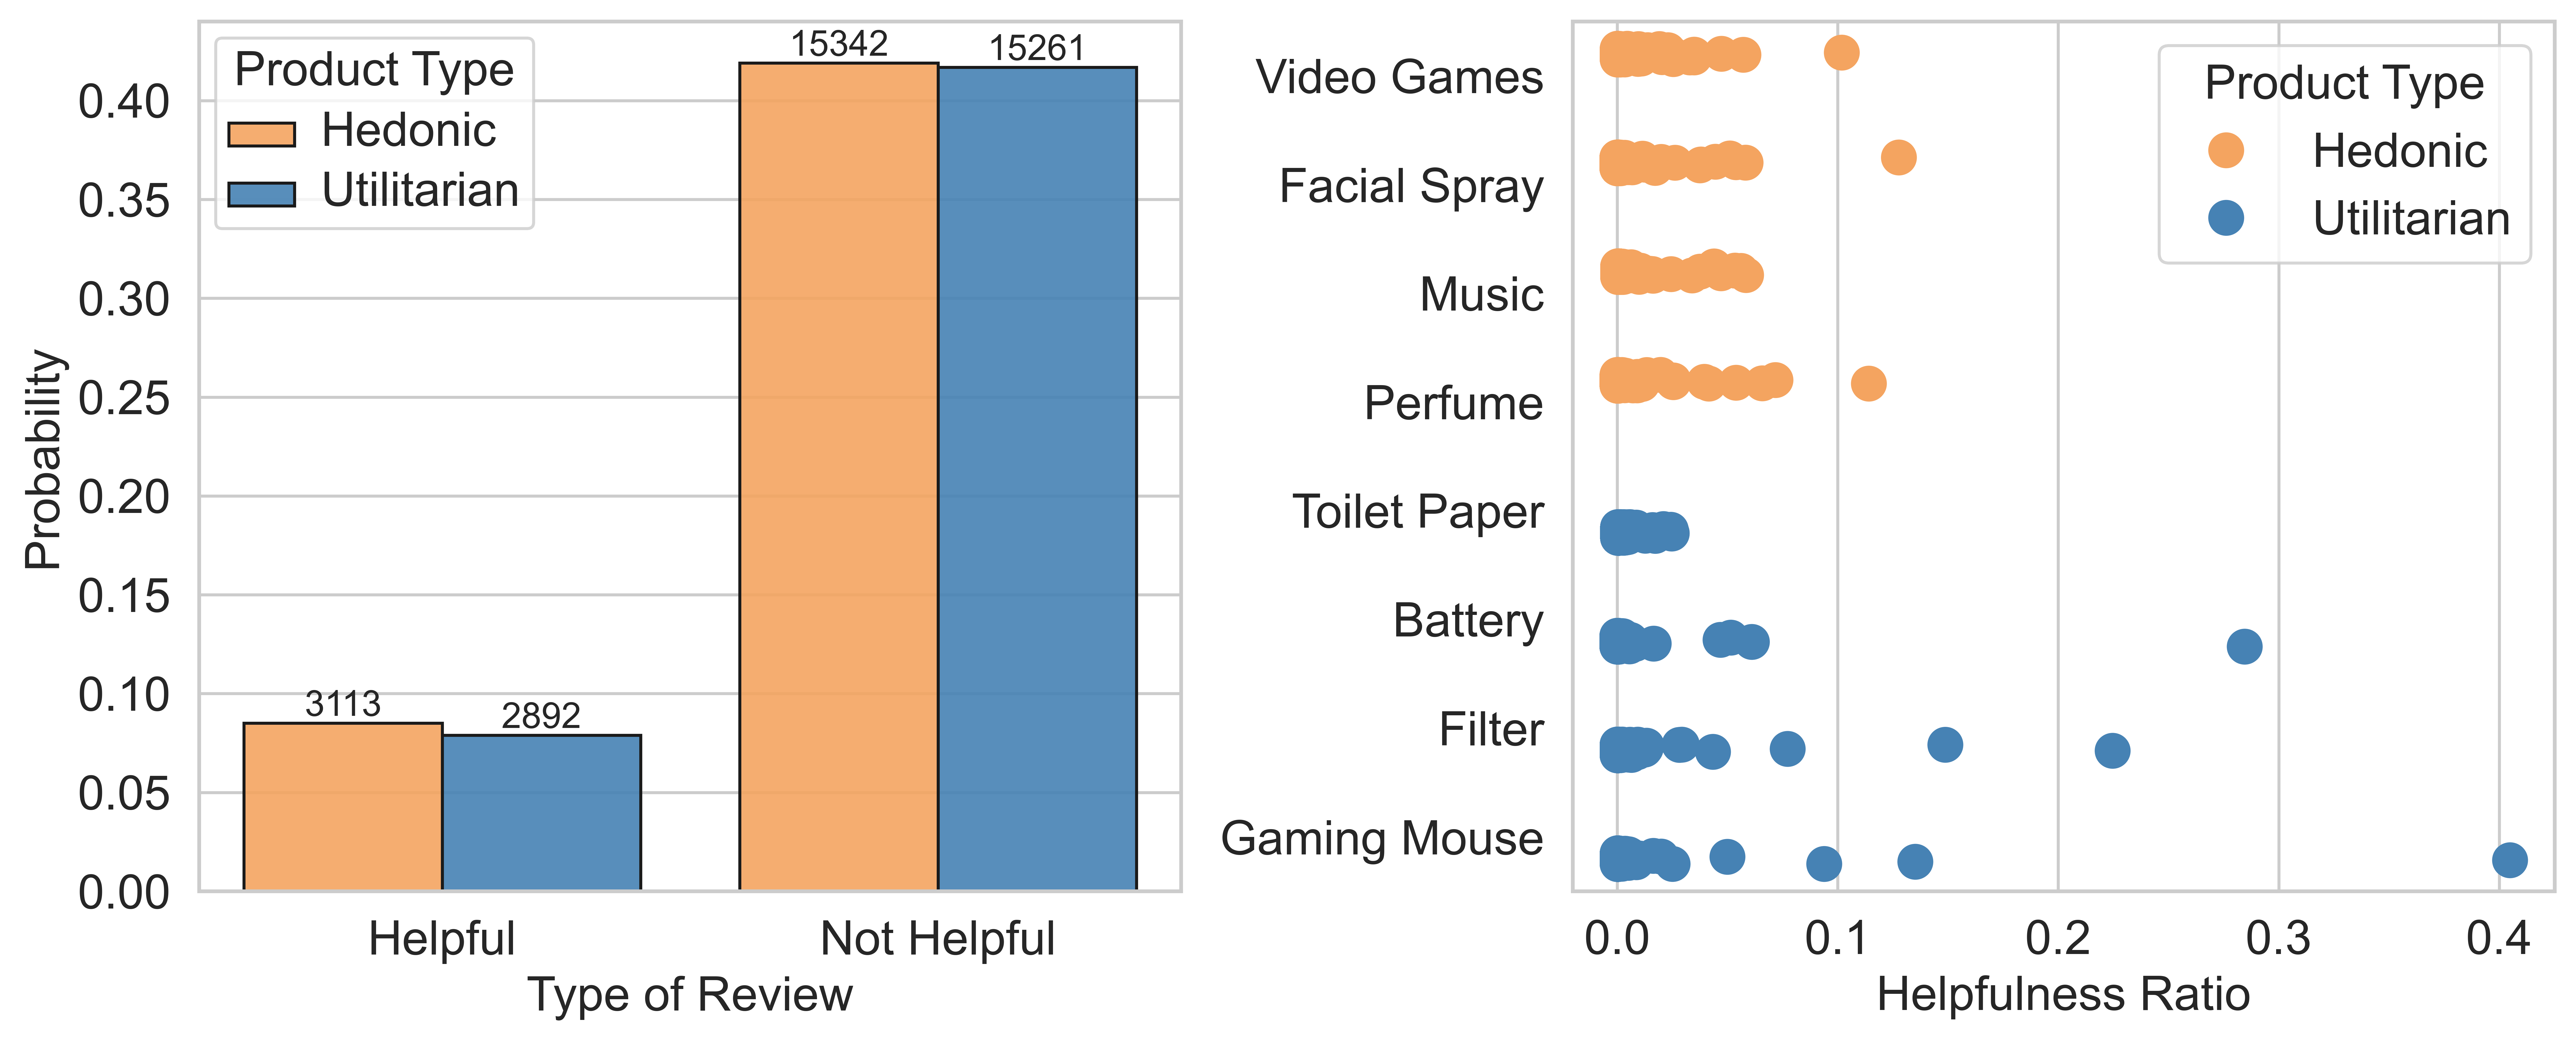

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

# Create 'Helpful_Code' column based on 'helpful_vote'
data['Helpful_Code'] = (data['helpful_vote'] > 0).astype(int)
data['Helpful_Code'] = data['Helpful_Code'].map({1: 'Helpful', 0: 'Not Helpful'})

# Create subplots without shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=800)

# Plot 1: Histogram of Helpful_Code by Product Type
help_plot = sns.histplot(data=data, x='Helpful_Code', hue='Product Type', multiple='dodge', stat='probability', ax=axes[0],
                         alpha=0.9, shrink=0.8, palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, edgecolor="k")
axes[0].set_xlabel('Type of Review', fontsize=16)
axes[0].set_ylabel('Probability', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].xaxis.grid(False)

# Calculate the counts and annotate the bars
counts = data.groupby(['Helpful_Code', 'Product Type']).size().unstack().fillna(0)
for container in help_plot.containers:
    labels = [f'{int(value.get_height()*counts.sum().sum()):d}' for value in container]
    help_plot.bar_label(container, labels=labels, fontsize=12, label_type='edge')

# Plot 2: Stripplot of helpful_ratio by Product ID and Product Type
prod_plot = sns.stripplot(x='helpful_ratio', y='Prod', hue='Product Type', data=data_helpful,
                          palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, size=12, jitter=True, dodge=True, ax=axes[1], orient='h')
axes[1].set_xlabel('Helpfulness Ratio', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16, title='Product Type', title_fontsize=16)

# Adjusting Legend Size
plt.setp(help_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(help_plot.get_legend().get_title(), fontsize='16')  # for legend title

# Adjusting Legend Size
plt.setp(prod_plot.get_legend().get_texts(), fontsize='16')  # for legend text
plt.setp(prod_plot.get_legend().get_title(), fontsize='16')  # for legend title

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Helpful_Code_Product_Type.png',dpi=400)
plt.show()


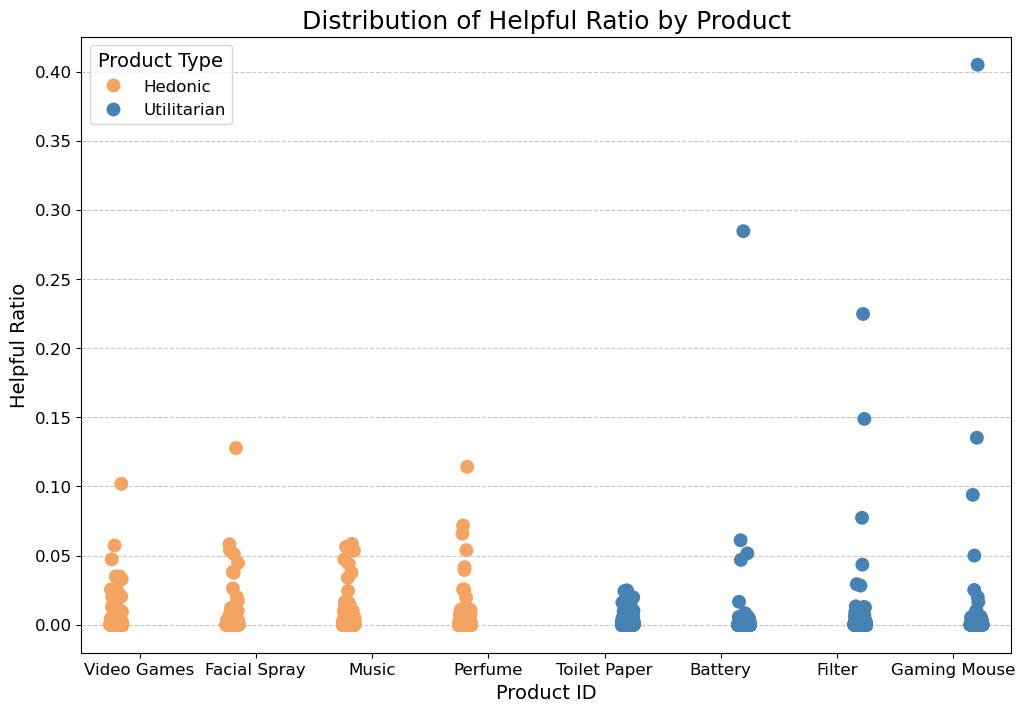

In [ ]:
# Map 'prod_type' to 'Product Type'
data['Product Type'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map 'prod_type' to 'Product Type' for both dataframes
data['Product Type'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data_helpful['Product Type'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})


# Plotting with Seaborn Strip Plot
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.stripplot(x='Prod', y='helpful_ratio', hue='Product Type', data=data,
              palette={'Utilitarian': 'steelblue', 'Hedonic': 'sandybrown'}, size=10, jitter=True, dodge=True)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Helpful Ratio', fontsize=14)
plt.title('Distribution of Helpful Ratio by Product', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title='Product Type', title_fontsize='14')
plt.show()